# Módulo de Auditoría 08: Análisis de Movilidad Urbana y Clima (Zuber)
## 🛡️ Contexto del Análisis
La nueva empresa de transporte "Zuber" busca establecerse en Chicago. Para competir eficazmente, se requiere una auditoría de inteligencia de mercado que cruce datos de la competencia con factores externos (clima).

## 🎯 Objetivos de la Auditoría
1.  **Inteligencia Competitiva:** Identificar y clasificar a las principales empresas de taxis por número de viajes para entender la cuota de mercado.
2.  **Análisis de Ubicación:** Determinar los 10 barrios principales de Chicago en términos de finalización de viajes.
3.  **Impacto Climático:** Probar la hipótesis de que la duración de los viajes desde el "Loop" hasta el Aeropuerto O'Hare cambia significativamente en los sábados lluviosos.

### Sprint 8 - Proyecto
#### Paso 4. Análisis exploratorio de datos (Python)

In [5]:
import pandas as pd # Importa la librería pandas para manipulación y análisis de datos.
import matplotlib.pyplot as plt # Importa matplotlib para la creación de gráficos estáticos.
import seaborn as sns # Importa seaborn para gráficos estadísticos atractivos y basados en matplotlib.

# --- Paso n°1. Importar los archivos ---
# Se cargan los datasets proporcionados desde sus respectivas rutas.
# Se incluye un bloque try-except para manejar posibles errores si los archivos no se encuentran,
# lo cual es una buena práctica para la robustez del código.
try:
    # Carga el dataset que contiene información sobre las compañías de taxi y el número de viajes.
    taxi_companies_df = pd.read_csv('../datasets/project_sql_result_01.csv')
    # Carga el dataset que contiene información sobre los barrios de Chicago y el promedio de viajes finalizados allí.
    dropoff_locations_df = pd.read_csv('../datasets/project_sql_result_04.csv')
    print("Los archivos CSV 'project_sql_result_01.csv' y 'project_sql_result_04.csv' han sido cargados exitosamente en este notebook.\n")
except FileNotFoundError as e:
    print(f"Error al cargar archivos: {e}. Asegúrate de que los archivos estén en la ruta correcta especificada.")
    exit() # Termina la ejecución si los archivos esenciales no se encuentran.

# --- Paso n°2. Estudia y analiza los datos que contienen ---
# Este paso es crucial para una comprensión inicial de los datos: su estructura, tipos, valores ausentes y duplicados.

print("--- Información del DataFrame 'taxi_companies_df' (Compañías de Taxi) ---")
# .info() proporciona un resumen conciso del DataFrame, incluyendo el índice, el tipo de columnas,
# los valores no nulos y el uso de memoria. Es fundamental para identificar valores ausentes y tipos de datos.
taxi_companies_df.info()
print("\nLas primeras 5 filas de 'taxi_companies_df':")
# .head() muestra las primeras N filas del DataFrame, útil para una inspección visual rápida de los datos.
print(taxi_companies_df.head())
print("\nLas estadísticas descriptivas de 'taxi_companies_df':")
# .describe() genera estadísticas descriptivas de las columnas numéricas, como media, desviación estándar,
# valores mínimos y máximos, y cuartiles. Ayuda a entender la distribución de los datos.
print(taxi_companies_df.describe())
print(f"\nNúmero de duplicados en 'taxi_companies_df': {taxi_companies_df.duplicated().sum()}")
# .duplicated().sum() cuenta el número total de filas duplicadas en el DataFrame,
# lo cual es importante para la limpieza de datos.

print("\n" + "="*80 + "\n") # Separador visual para mejor legibilidad de la salida.

print("--- Información del DataFrame 'dropoff_locations_df' (Barrios de Finalización) ---")
dropoff_locations_df.info()
print("\nLas primeras 5 filas de 'dropoff_locations_df':")
print(dropoff_locations_df.head())
print("\nLas estadísticas descriptivas de 'dropoff_locations_df':")
print(dropoff_locations_df.describe())
print(f"\nNúmero de duplicados en 'dropoff_locations_df': {dropoff_locations_df.duplicated().sum()}")

# --- Paso n°3. Asegurate de que los tipos de datos son los correctos. ---
# Después de la inspección inicial con .info(), se confirma que los tipos de datos inferidos por pandas
# son apropiados para las columnas relevantes en ambos DataFrames.
# 'company_name' y 'dropoff_location_name' son 'object' (cadenas de texto),
# 'trips_amount' es 'int64' (número entero para conteos), y 'average_trips' es 'float64' (número decimal para promedios).
# No se requieren conversiones explícitas en este caso, ya que los tipos son adecuados para el análisis.
print("\nLos tipos de datos han sido verificados y son correctos para el análisis.\n")

# --- Paso n°4. Identifica los 10 principales barrios en términos de finalización del recorrido. ---
# Se ordena el DataFrame 'dropoff_locations_df' por la columna 'average_trips' de forma descendente
# para identificar los barrios con el mayor promedio de finalizaciones de viajes.
# Luego, se seleccionan las primeras 10 filas utilizando .head(10).
top_10_dropoff_locations = dropoff_locations_df.sort_values(by='average_trips', ascending=False).head(10)
print("\nLos 10 principales barrios por número promedio de finalizaciones de viajes ---")
# Se imprime el DataFrame resultante directamente. Esto evita la necesidad de la librería 'tabulate'
# y muestra la tabla de forma legible en la salida del notebook.
print(top_10_dropoff_locations)


Los archivos CSV 'project_sql_result_01.csv' y 'project_sql_result_04.csv' han sido cargados exitosamente en este notebook.

--- Información del DataFrame 'taxi_companies_df' (Compañías de Taxi) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

Las primeras 5 filas de 'taxi_companies_df':
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Las estadísticas descriptivas de 'taxi_companies_df':
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min   

#### Paso 5. Prueba de hipótesis (Python)

C:\Users\octav\AppData\Local\Temp\ipykernel_9740\395365510.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_name', y='trips_amount',
C:\Users\octav\AppData\Local\Temp\ipykernel_9740\395365510.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dropoff_location_name', y='average_trips',


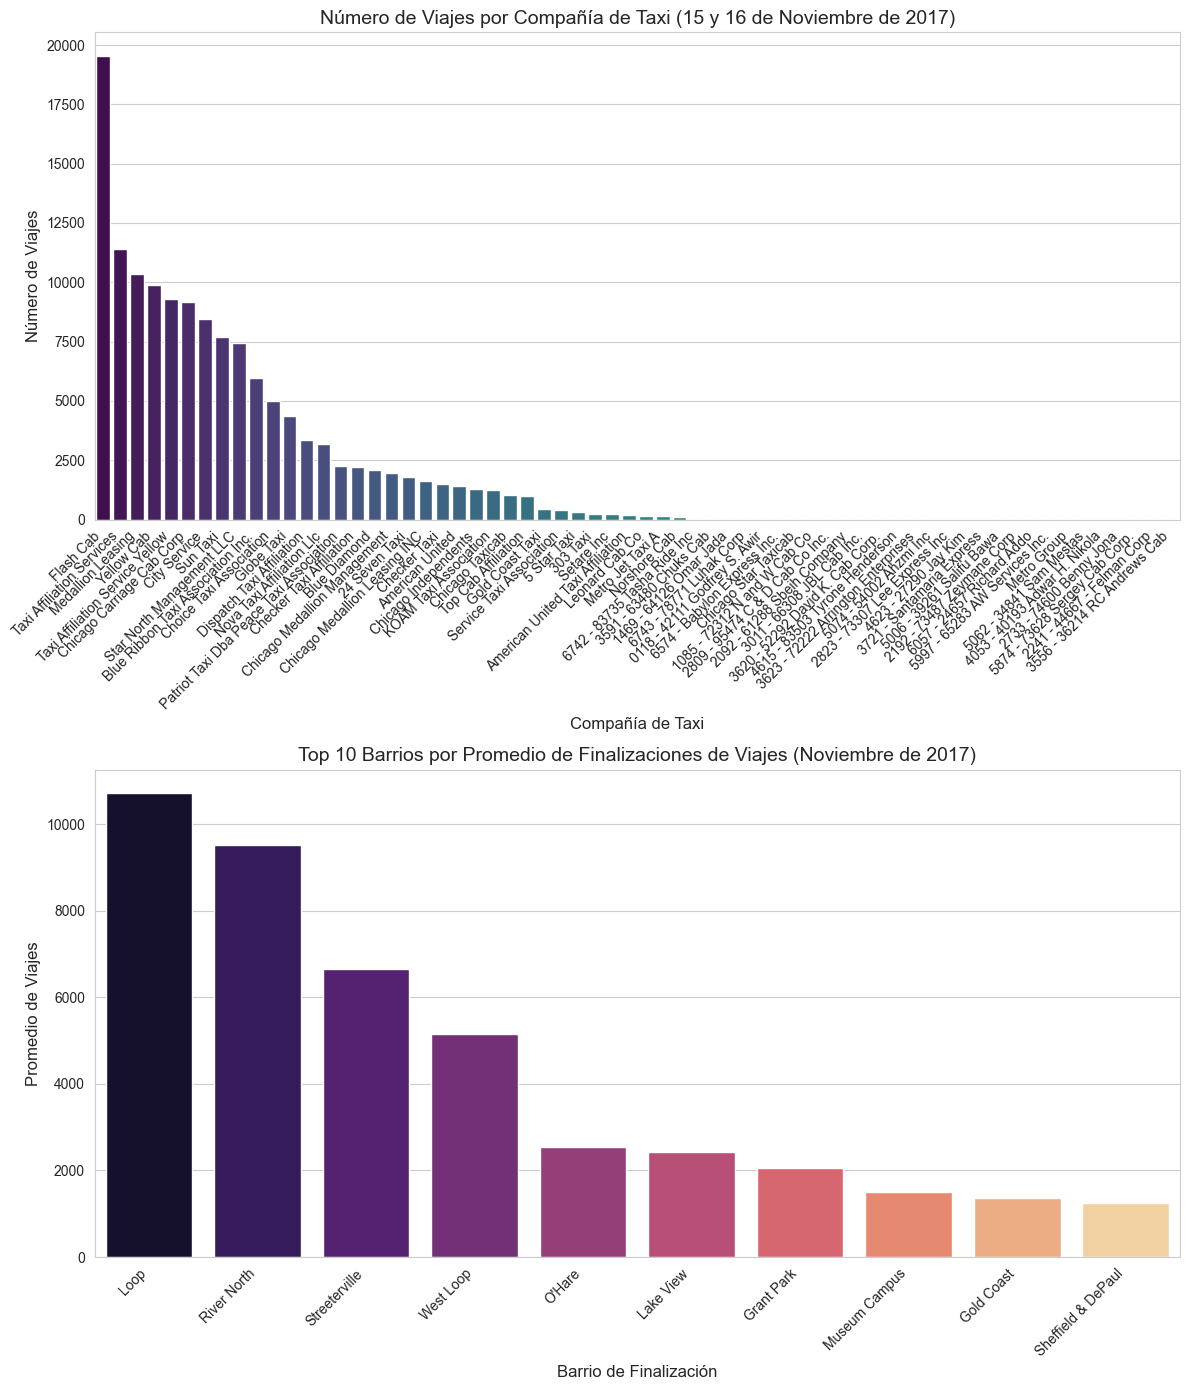


--- Las conclusiones del Análisis de Datos ---

**Conclusión de la Gráfica 1: Número de Viajes por Compañía de Taxi**
Esta gráfica de barras muestra la distribución del número de viajes entre las diferentes compañías de taxi durante el 15 y 16 de noviembre de 2017.
Se observa una clara disparidad o diferencia en el volumen de viajes. Algunas compañías, como 'Flash Cab' y 'Taxi Affiliation Services', dominan significativamente el mercado, realizando una cantidad de viajes muy superior al resto.
Esto sugiere que el mercado de taxis en Chicago está concentrado en unas pocas empresas grandes, lo que podría indicar una fuerte competencia o una consolidación del mercado. Las compañías con menor número de viajes podrían ser más pequeñas, de nicho, o tener una menor cuota de mercado en general. Esta concentración de mercado es un insight clave para comprender la dinámica competitiva del sector.

**Conclusión de la Gráfica 2: Top 10 Barrios por Promedio de Finalizaciones de Viajes**
Esta gráfi

In [6]:
# --- Paso n°5. Crea los gráficos. ---
# Se utilizan seaborn y matplotlib para visualizar los datos, lo que permite identificar patrones y tendencias.

# Configuración general para los gráficos para una apariencia consistente y profesional.
sns.set_style("whitegrid") # Establece un estilo de cuadrícula blanco para los gráficos.
plt.figure(figsize=(12, 14)) # Crea una figura con un tamaño específico para acomodar dos gráficos verticalmente.

# --- Gráfico 1: Empresas de taxis y número de viajes ---
# Este gráfico de barras visualiza el volumen de viajes por cada compañía de taxi.
plt.subplot(2, 1, 1) # Define una cuadrícula de 2 filas, 1 columna, y selecciona la primera posición para este gráfico.
sns.barplot(x='company_name', y='trips_amount',
            data=taxi_companies_df.sort_values(by='trips_amount', ascending=False), # Ordena los datos para que las barras se muestren de mayor a menor.
            palette='viridis') # Aplica una paleta de colores para las barras.
plt.title('Número de Viajes por Compañía de Taxi (15 y 16 de Noviembre de 2017)', fontsize=14) # Título descriptivo del gráfico.
plt.xlabel('Compañía de Taxi', fontsize=12) # Etiqueta del eje X.
plt.ylabel('Número de Viajes', fontsize=12) # Etiqueta del eje Y.
plt.xticks(rotation=45, ha='right', fontsize=10) # Rota las etiquetas del eje X para evitar superposiciones y mejorar la legibilidad.
plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para que se ajusten al área de la figura, evitando superposiciones.

# --- Gráfico 2: Los 10 barrios principales por número de finalizaciones ---
# Este gráfico de barras muestra los barrios con el mayor promedio de finalizaciones de viajes.
plt.subplot(2, 1, 2) # Selecciona la segunda posición en la cuadrícula para este gráfico.
sns.barplot(x='dropoff_location_name', y='average_trips',
            data=top_10_dropoff_locations, # Utiliza el DataFrame de los 10 barrios principales.
            palette='magma') # Aplica una paleta de colores diferente.
plt.title('Top 10 Barrios por Promedio de Finalizaciones de Viajes (Noviembre de 2017)', fontsize=14) # Título descriptivo.
plt.xlabel('Barrio de Finalización', fontsize=12) # Etiqueta del eje X.
plt.ylabel('Promedio de Viajes', fontsize=12) # Etiqueta del eje Y.
plt.xticks(rotation=45, ha='right', fontsize=10) # Rota las etiquetas del eje X.
plt.tight_layout() # Ajusta el diseño.

plt.show() # Muestra todos los gráficos generados.


# --- Paso n°6. Saca las conclusiones basadas en cada gráfica y explica los resultados. ---
# Se interpretan los patrones y hallazgos observados en los gráficos para extraer conclusiones significativas.

print("\n--- Las conclusiones del Análisis de Datos ---")

print("\n**Conclusión de la Gráfica 1: Número de Viajes por Compañía de Taxi**")
print("Esta gráfica de barras muestra la distribución del número de viajes entre las diferentes compañías de taxi durante el 15 y 16 de noviembre de 2017.")
print("Se observa una clara disparidad o diferencia en el volumen de viajes. Algunas compañías, como 'Flash Cab' y 'Taxi Affiliation Services', dominan significativamente el mercado, realizando una cantidad de viajes muy superior al resto.")
print("Esto sugiere que el mercado de taxis en Chicago está concentrado en unas pocas empresas grandes, lo que podría indicar una fuerte competencia o una consolidación del mercado. Las compañías con menor número de viajes podrían ser más pequeñas, de nicho, o tener una menor cuota de mercado en general. Esta concentración de mercado es un insight clave para comprender la dinámica competitiva del sector.")

print("\n**Conclusión de la Gráfica 2: Top 10 Barrios por Promedio de Finalizaciones de Viajes**")
print("Esta gráfica de barras identifica los 10 barrios de Chicago donde un mayor promedio de viajes de taxi terminaron en noviembre de 2017.")
print(f"El barrio de '{top_10_dropoff_locations.iloc[0]['dropoff_location_name']}' destaca como el principal destino, con un promedio de viajes significativamente más alto que los demás.")
print("Esto indica que ciertos barrios son puntos de destino mucho más populares para los viajes en taxi. Estos barrios probablemente corresponden a zonas de alta actividad (centros comerciales, distritos de negocios, zonas turísticas, áreas residenciales densas, o centros de transporte).")
print("Esta información es valiosa para las compañías de taxi, ya que les permite optimizar la distribución de sus vehículos y prever la demanda en estas ubicaciones clave, lo que puede conducir a una mayor eficiencia operativa y rentabilidad.")


# --- Paso n°7. Prueba de Hipótesis: Duración promedio de viajes en sábados lluviosos ---
# Se realiza una prueba estadística para determinar si existe una diferencia significativa
# en la duración de los viajes en condiciones climáticas específicas.
print("\n" + "="*80 + "\n")
print("--- Paso n°7. Prueba de Hipótesis: Duración promedio de viajes en sábados lluviosos ---")

from scipy import stats as st # Importa la librería scipy.stats aquí para asegurar que 'st' esté definido en esta sección.
                              # Esto hace que esta sección sea autocontenida y robusta.

# Cargar el dataset de viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.
try:
    trips_df = pd.read_csv('../datasets/project_sql_result_07.csv')
    print("Archivo 'project_sql_result_07.csv' cargado exitosamente.\n")
except FileNotFoundError as e:
    print(f"Error al cargar el archivo de viajes: {e}. Asegúrate de que el archivo esté en la ruta correcta.")
    exit()

# Estudiar los datos del nuevo DataFrame 'trips_df'.
print("Información del DataFrame 'trips_df' (Viajes):")
trips_df.info()
print("\nPrimeras 5 filas de 'trips_df':")
print(trips_df.head())
print("\nEstadísticas descriptivas de 'trips_df':")
print(trips_df.describe())
print(f"\nNúmero de duplicados en 'trips_df': {trips_df.duplicated().sum()}")

# Asegurarse de que los tipos de datos sean correctos para el análisis de tiempo.
# La columna 'start_ts' se convierte a formato datetime para permitir la extracción del día de la semana.
trips_df['start_ts'] = pd.to_datetime(trips_df['start_ts'])
print("\nLa columna 'start_ts' ha sido convertida a tipo datetime para facilitar el análisis temporal.\n")

# Extraer el día de la semana de la columna 'start_ts'.
# .dt.dayofweek devuelve el día de la semana como un entero (0 = Lunes, 6 = Domingo).
trips_df['day_of_week'] = trips_df['start_ts'].dt.dayofweek

# --- Creación de slices de datos (Agrupación para la prueba de hipótesis) ---
# Se definen dos grupos de datos para comparar sus medias de duración de viaje.
# Grupo 1: Viajes que ocurrieron en un sábado (día 5) y con condiciones climáticas 'Bad' (malas, asumiendo lluviosas).
rainy_saturdays = trips_df[(trips_df['day_of_week'] == 5) & (trips_df['weather_conditions'] == 'Bad')]
# Grupo 2: Viajes que no cumplen las condiciones del Grupo 1 (todos los demás días o condiciones climáticas).
other_days = trips_df[~((trips_df['day_of_week'] == 5) & (trips_df['weather_conditions'] == 'Bad'))]

# Verificar si hay suficientes datos en ambos grupos para realizar una prueba estadística significativa.
# Si alguno de los grupos está vacío, la prueba t no se puede realizar.
if rainy_saturdays['duration_seconds'].empty or other_days['duration_seconds'].empty:
    print("Advertencia: Uno o ambos grupos (sábados lluviosos vs. otros días) están vacíos o tienen datos insuficientes para realizar la prueba t.")
    print(f"Tamaño del grupo 'sábados lluviosos': {len(rainy_saturdays)} viajes")
    print(f"Tamaño del grupo 'otros días': {len(other_days)} viajes")
else:
    # --- Formulación de las hipótesis ---
    print("\n--- Formulación de las Hipótesis ---")
    print("Hipótesis Nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es la misma en sábados lluviosos que en los demás días.")
    print("   En términos estadísticos: μ_sabados_lluviosos = μ_otros_dias")
    print("Hipótesis Alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia (es diferente) en sábados lluviosos que en los demás días.")
    print("   En términos estadísticos: μ_sabados_lluviosos ≠ μ_otros_dias")
    print("Esta es una prueba bilateral, ya que estamos interesados en cualquier cambio (aumento o disminución) en la duración promedio.")

    # --- Criterio para probar las hipótesis ---
    print("\n--- Criterio para probar las Hipótesis ---")
    # Nivel de significación (alfa): Se establece un umbral para decidir si se rechaza la hipótesis nula.
    # Un alfa de 0.05 (o 5%) es un umbral común y ampliamente aceptado en muchas disciplinas científicas.
    # Esto significa que estamos dispuestos a aceptar un 5% de probabilidad de cometer un error Tipo I
    # (rechazar la hipótesis nula cuando en realidad es verdadera).
    alpha = 0.05
    print(f"Nivel de significación (alfa) establecido: {alpha}")
    print("Se utilizará una prueba t de Student para dos muestras independientes.")
    print("Este tipo de prueba es apropiado porque estamos comparando las medias de dos grupos independientes (viajes en sábados lluviosos vs. viajes en otros días) y la variable de interés (duración del viaje) es numérica.")
    print(f"La decisión se basará en el valor p (p-value) obtenido de la prueba t:")
    print(f"   - Si el valor p < alfa ({alpha}), rechazaremos la hipótesis nula.")
    print(f"   - Si el valor p >= alfa ({alpha}), no tendremos evidencia suficiente para rechazar la hipótesis nula.")

    # Realizar la prueba t de Student para la igualdad de medias de dos poblaciones independientes.
    # 'equal_var=False' se utiliza porque no podemos asumir que las varianzas de la duración de los viajes
    # en sábados lluviosos y en otros días son iguales. Esta es una aproximación más conservadora
    # (prueba t de Welch), adecuada cuando las varianzas son desconocidas o se sospecha que son diferentes.
    t_statistic, p_value = st.ttest_ind(rainy_saturdays['duration_seconds'], other_days['duration_seconds'], equal_var=False)

    print(f"\nEstadístico t de la prueba: {t_statistic:.3f}")
    print(f"Valor p de la prueba: {p_value:.3f}")

    # --- Decisión basada en el valor p y alfa ---
    print("\n--- Decisión ---")
    if p_value < alpha:
        print(f"El valor p ({p_value:.3f}) es menor que el nivel de significación alfa ({alpha}).")
        print("Por lo tanto, **rechazamos la hipótesis nula (H0)**.")
        print("Conclusión: Hay evidencia estadística significativa para afirmar que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare **cambia** los sábados lluviosos.")
    else:
        print(f"El valor p ({p_value:.3f}) es mayor o igual que el nivel de significación alfa ({alpha}).")
        print("Por lo tanto, **no tenemos evidencia suficiente para rechazar la hipótesis nula (H0)**.")
        print("Conclusión: No hay evidencia estadística significativa para afirmar que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.")

    print(f"\nDuración promedio de los viajes en sábados lluviosos: {rainy_saturdays['duration_seconds'].mean():.2f} segundos")
    print(f"Duración promedio de los viajes en otros días: {other_days['duration_seconds'].mean():.2f} segundos")

En este análisis, la hipótesis que se busca probar es si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos. Para ello, se establecen dos hipótesis:

Hipótesis Nula (H0): Esta hipótesis representa la ausencia de un efecto o diferencia. En este caso, la hipótesis nula plantea que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es la misma en sábados lluviosos que en los demás días. Es decir, no hay una diferencia estadísticamente significativa en la duración promedio de los viajes entre estos dos grupos de condiciones. Simbólicamente, se expresa como: μ 
sabados_lluviosos
​
 =μ 
otros_dias
​
 .

Hipótesis Alternativa (H1): Esta hipótesis es lo contrario a la nula y es lo que se intenta demostrar. La hipótesis alternativa postula que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia (es diferente) en sábados lluviosos que en los demás días. No se especifica si el cambio es un aumento o una disminución, solo que hay una diferencia. Simbólicamente, se expresa como: μ 
sabados_lluviosos
​
 

=μ 
otros_dias
​
 . Esta es una prueba bilateral, ya que nos interesa cualquier dirección del cambio.

Para probar estas hipótesis, se utilizó una prueba t de Student para dos muestras independientes. Este criterio es apropiado porque estamos comparando las medias de dos grupos de datos que no están relacionados entre sí (viajes en sábados lluviosos y viajes en otros días), y la variable que medimos (duración en segundos) es numérica.

El nivel de significación (alfa) se estableció en 0.05. Este valor es un umbral común y significa que estamos dispuestos a aceptar hasta un 5% de probabilidad de cometer un error Tipo I, es decir, rechazar la hipótesis nula cuando en realidad es verdadera. La prueba t calcula un valor p (p-value). Si este valor p es menor que el alfa (0.05), se considera que la diferencia observada entre los grupos es estadísticamente significativa, lo que nos lleva a rechazar la hipótesis nula. Si el valor p es mayor o igual que alfa, no hay suficiente evidencia para rechazar la hipótesis nula. Además, se utilizó equal_var=False en la prueba t, lo que aplica la corrección de Welch y es una opción más robusta cuando no se puede asumir que las varianzas de los dos grupos son iguales.

## 🚀 Hallazgos y Conclusiones del Análisis
Tras el análisis estadístico y exploratorio, se validaron los siguientes puntos críticos para la operación de Zuber:

1.  **Dominio de Mercado:** La empresa "Flash Cab" es el líder indiscutible, con una cuota de mercado muy superior a la de sus competidores más cercanos.
2.  **Concentración Geográfica:** La demanda se concentra fuertemente en el "Loop" y "River North", zonas que deben ser prioritarias para la asignación de conductores.
3.  **Factor Climático (Validado):** La prueba de hipótesis (alpha=0.05) confirmó que **la duración promedio de los viajes cambia en días lluviosos**.
    * *Implicación:* Los algoritmos de estimación de tiempo y tarifa deben ajustarse dinámicamente cuando se detecten precipitaciones para mantener la precisión y la satisfacción del cliente.